# Plant Nutrition Prediction



## Introduction

Halo. Nama saya Una Dika. Saya seorang profesional bisnis dengan latar belakang di bidang Perencanaan Wilayah dan perkotaan dan memiliki pengalaman dalam pengembangan bisnis dan analisis keuangan. Baru-baru ini saya menyelesaikan bootcamp di Hactiv8 dalam program full time data science dan sedang mencari peluang untuk memanfaatkan keterampilan yang baru diperoleh dalam analisis dan pemodelan data.

Pada notebook ini akan didemonstrasikan salah satu teknik dalam machine learning yaitu Plant Nutrition prediction (prediksi nutrisi tanaman memanfaatkan library scikit-learn. Dalam proyek ini, kami akan menggunakan kumpulan data yang berisikan informasi tentang unsur-unsur yang dimasukkan ke tanaman pada dua lab berbeda untuk melatih model memprediksi nutrisi tanaman. Kami akan menggunakan berbagai teknik seperti *data cleaning*, *feature engineering*, dan *model selection* untuk melatih dan mengevaluasi model kami. Tujuan dari proyek ini adalah untuk membangun sebuah model yang dapat secara akurat memprediksi nutrisi tanaman berdasarkan unsur-unsur yang masuk ke dalamnya. 

## Background

Tanaman merupakan salah satu sumber pangan utama bagi manusia dan hewan. Kualitas tanaman tergantung pada ketersediaan nutrisi dan unsur hara yang dibutuhkan untuk tumbuh dan berkembang. Oleh karena itu, perhatian yang besar diberikan pada pengelolaan nutrisi tanaman agar dapat meningkatkan hasil panen dan kualitas produk.

Di dalam ilmu pertanian, pemantauan ketersediaan nutrisi tanaman dapat dilakukan dengan melakukan pengujian unsur hara pada tanaman. Pengujian ini dilakukan di laboratorium dengan menggunakan metode kimia. Namun, metode pengujian tersebut memerlukan waktu yang lama dan biaya yang cukup besar.

Dalam proyek ini, kami mencoba untuk membangun model prediksi untuk menentukan kandungan nutrisi tanaman berdasarkan unsur hara dan vitamin yang diberikan. Model ini dapat membantu para petani dan ahli pertanian dalam mengoptimalkan penggunaan pupuk dan memberikan nutrisi yang tepat pada tanaman. Kami akan menggunakan teknik machine learning untuk memprediksi kandungan nutrisi tanaman berdasarkan unsur hara dan vitamin yang diberikan, dengan mempertimbangkan perbedaan hasil pengujian antara dua laboratorium yang berbeda.

## External Links

If you want to check our prediction result using our model, please visit our [Deployment link](https://huggingface.co/spaces/SwaggerLagger/TalentFair)

We also share our Presentation through this [link](https://www.canva.com/design/DAFbD2IEPYM/EtHDYSDov5ZhwXkC-IqeeQ/view?utm_content=DAFbD2IEPYM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

## Working Area
### Libraries

In [1]:
# library yang digunakan dalam project ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

import joblib
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Loading dan Mengubah dataset menjadi data frame menggunakan library pandas
df = pd.read_excel('aria_data.xlsx')

# Menampilkan 10 data teratas
df.head(10)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
5,4.88,268.722222,193.000000,364.944444,345.888889,405.444444,210.055556,650.666667,4493.944444,lab 1
6,4.55,255.866667,182.133333,359.466667,326.800000,389.466667,191.866667,632.266667,4386.733333,lab 1
7,4.74,248.933333,203.933333,365.200000,332.933333,390.933333,202.200000,664.000000,4646.200000,lab 1
8,4.72,269.000000,191.466667,381.200000,353.200000,403.533333,217.800000,714.533333,4751.466667,lab 1
9,4.72,268.266667,178.800000,370.000000,342.466667,384.533333,204.733333,690.333333,4255.200000,lab 1


In [3]:
# Menampilkan 10 data terbawah
df.tail(10)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
150,4.80,583.8750,349.187500,641.625000,477.000000,664.000000,327.812500,665.750000,3917.625000,lab 2
151,4.62,570.5625,344.062500,629.062500,487.437500,672.937500,323.750000,708.750000,3889.375000,lab 2
152,4.73,567.5625,356.500000,623.000000,476.500000,661.062500,321.062500,695.937500,3858.500000,lab 2
153,4.13,646.4000,389.666667,684.600000,527.000000,699.400000,354.933333,759.133333,3895.400000,lab 2
154,4.79,624.2000,377.666667,645.666667,486.733333,699.733333,364.400000,734.200000,3741.266667,lab 2
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800000,346.266667,718.733333,3903.333333,lab 2


In [4]:
# Mengecek Informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [5]:
# Mengecek missing value pada data yang digunakan
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Tidak ditemukan missing value pada data

## Exploratory Data Analysis

In [36]:
# Mengecek deskripsi statistik pada data (numerik)
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


<AxesSubplot: xlabel='sample_type'>

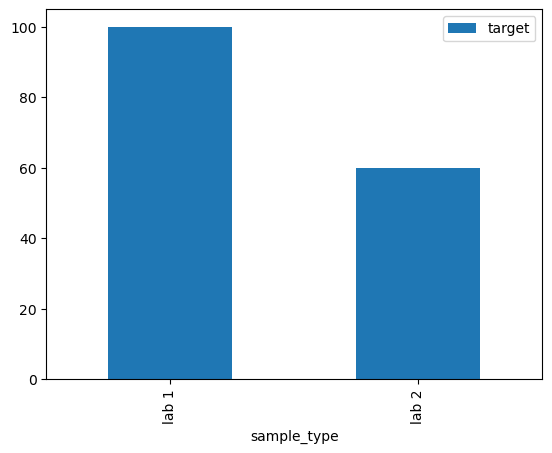

In [44]:
# Menampilkan visualisasi target pada masing-masing lab
df.groupby('sample_type')[['target']].count().sort_values('sample_type').plot(kind='bar')

Dari visualisasi di atas diketahui bahwa lab 1 memiliki jumlah sample yang lebih banyak dibandingkan lab 2

In [7]:
# mengkategorikan data menjadi numerical dan categorical
df_num = df.select_dtypes(exclude = ['object'])
df_cat = df.select_dtypes(include = ['object'])

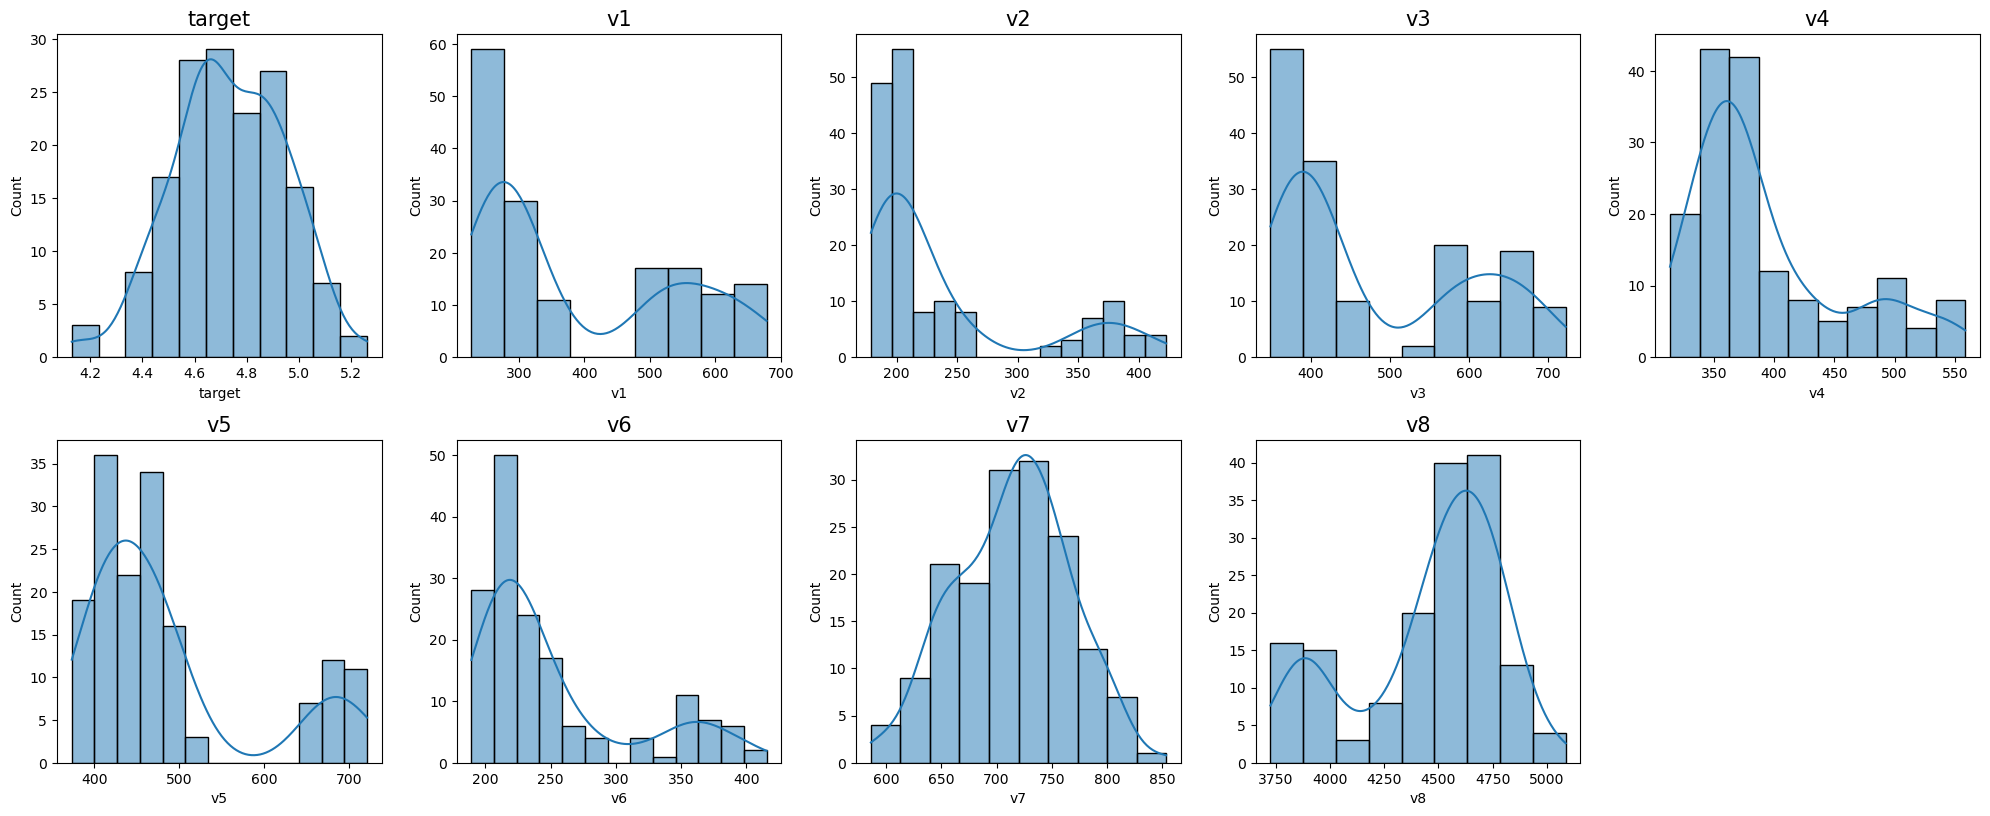

In [8]:
# Menampilkan visualisasi histogram data
cols = list(df_num)
plt.figure(figsize = (20, 20))
for i in range(len(cols)):
    plt.subplot(len(cols)//2+1, 5, i + 1)
    sns.histplot(df_num[cols[i]], kde=True)
    plt.title(cols[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

Dari visualisasi di atas diketahui bahwa sebaran data dari v1-v6 memiliki persebaran yang condong ke kiri. Artinya nilai pada masing-masing unsur tersebut mayoritas berada di nilai yang rendah. Sedangkan v8 memiliki persebaran yang condong ke kanan. Artinya nilai pada unsur v8 mayoritas memiliki nilai yang tinggi. V7 sendiri memiliki persebaran yang normal

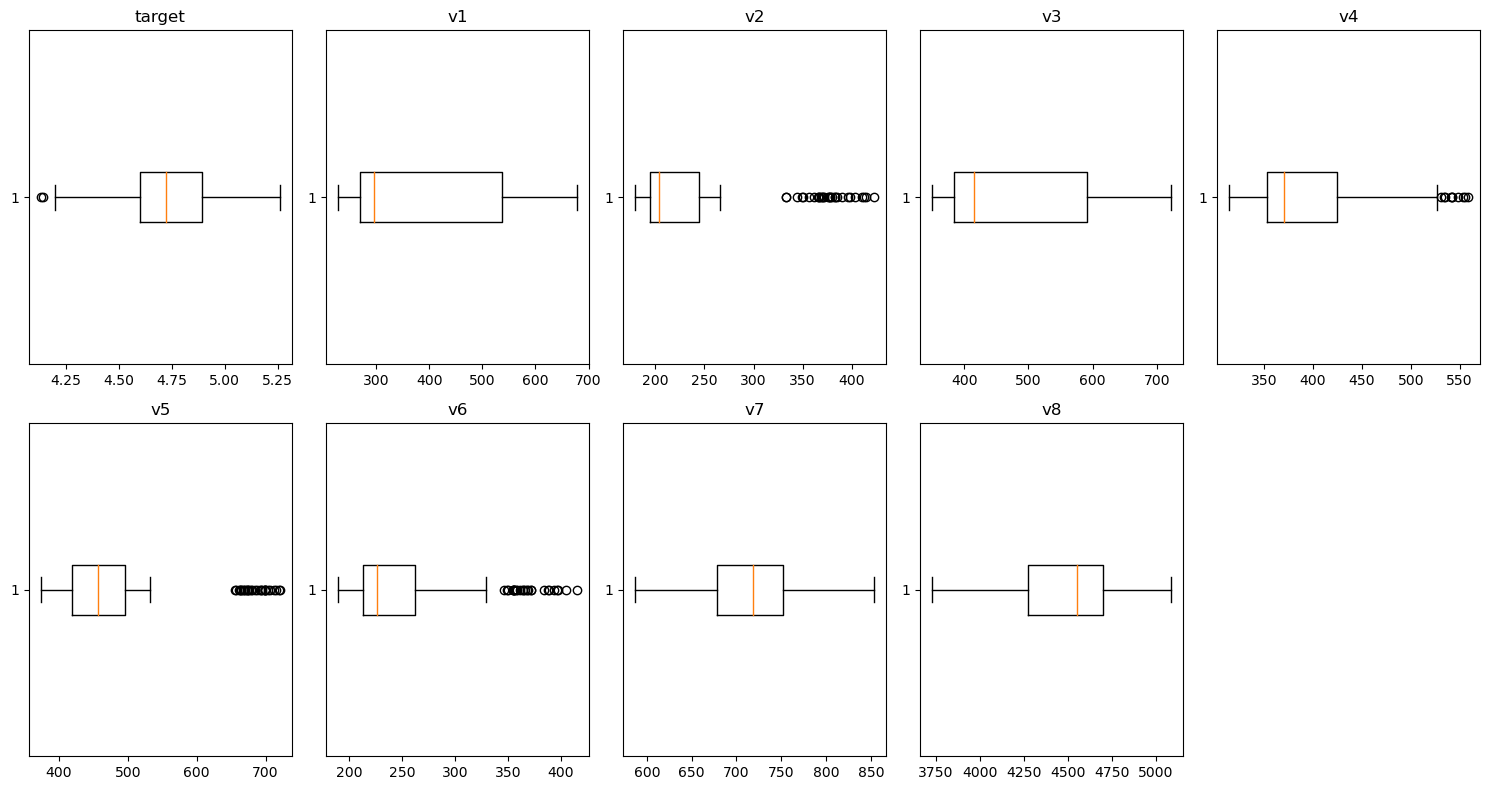

In [9]:
# membuat visualisasi boxplot untuk melihat outliers pada data 
nrows, ncols = 2, 5

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

axs = axs.flatten()

for i, col in enumerate(df_num.columns):
    axs[i].boxplot(df_num[col], vert=False)
    axs[i].set_title(col)
    
for j in range(len(df_num.columns), nrows*ncols):
    axs[j].axis('off')
    
fig.tight_layout()
plt.show()


Dari visualisasi di atas diketahui bahwa terdapat outliers pada v2, v4, v5 dan v6. Untuk memudahkan model memahami data, selanjutnya outlier akan dihilangkan.

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


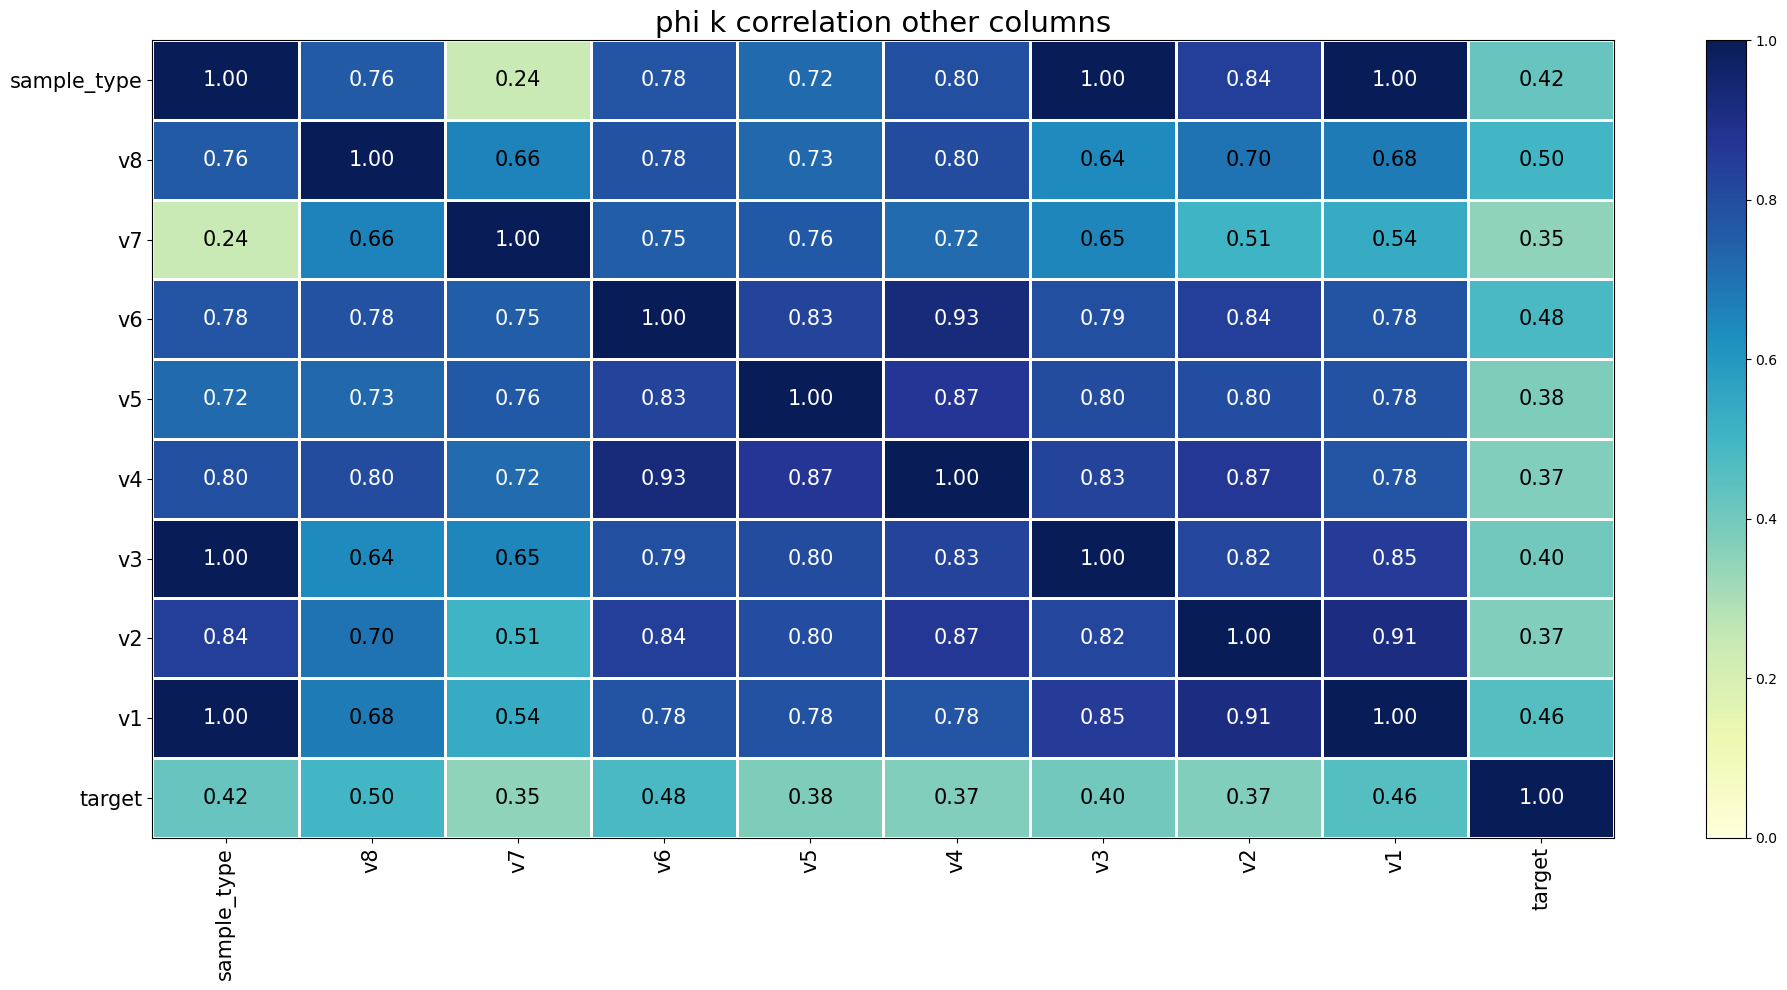

In [10]:
# Mengecek korelasi antar kolom pada data menggunakan phik
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="YlGnBu", 
                        title=r"phi k correlation other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()

In [11]:
df.phik_matrix().target.sort_values(ascending=False)

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


target         1.000000
v8             0.499367
v6             0.480621
v1             0.459417
sample_type    0.424614
v3             0.401402
v5             0.378586
v4             0.374938
v2             0.373085
v7             0.348524
Name: target, dtype: float64

Memanfaatkan visualisasi heatmap, kami mencoba mencari korelasi setiap kolom terhadap kolom target. Diketahui bahwa, setiap kolom memiliki korelasi atau hubungan yang cukup terhadap kolom target

## Data Preprocessing

In [12]:
# split data menjadi data train dan data test
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(112, 9)
(48, 9)
(112,)
(48,)


Split data digunakan untuk keperluan evaluasi model dengan membandingkan hasil metric antara data train dan data test. Selanjutnya model akan dilatih menggunakan data train. 
Jumlah data train yang di dapat setelah proses split sebesar 112 entry data sedangkan data test sebesar 48 atau 30% dari keseluruhan data.

In [13]:
X_train.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
118,557.266667,210.800000,586.666667,370.733333,462.466667,203.466667,658.466667,4530.333333,lab 2
95,331.466667,244.866667,424.533333,404.333333,457.800000,257.733333,769.733333,4871.666667,lab 1
55,272.333333,205.000000,383.266667,366.666667,414.000000,222.333333,711.333333,4701.466667,lab 1
109,525.333333,195.066667,591.866667,382.733333,478.600000,207.466667,657.200000,4690.600000,lab 2
18,266.533333,203.000000,393.933333,358.000000,428.400000,219.666667,715.800000,4848.133333,lab 1


In [14]:
# Duplikat X_train untuk keperluan preprocessing
X_train_eda = X_train.copy()

In [15]:
num_col = X_train.describe().columns.tolist()
cat_col = ['sample_type']

### Outliers Handling

In [16]:
# outlier handling menggunakan winsorizer
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])

X_train_eda = wins.fit_transform(X_train_eda)
X_train_eda.describe()

,v1,v2,v3,v4,v5,v6,v7,v8
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,389.592462,222.648389,478.758910,388.495251,470.382201,241.726988,709.531973,4457.199094
std,150.306130,42.504752,119.173725,55.874338,72.941297,43.925328,48.582239,334.709298
min,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3738.466667
25%,268.153125,193.729762,383.421429,348.933333,416.550000,211.463889,677.183333,4266.862500
50%,288.443750,204.187500,404.762500,368.906250,452.366667,222.375000,714.133333,4534.385417
75%,537.733333,237.484375,589.819079,408.394792,492.643750,256.105208,745.969792,4701.850000
max,678.375000,303.116295,722.312500,497.586979,606.784375,323.067188,804.000000,5086.375000


### Scaling Numerical

Scaling numerical data menjadi lebih simple sehingga model dapat membaca data lebih cepat dan efisien

In [18]:
scaler = StandardScaler()

X_train_eda[num_col] = scaler.fit_transform(X_train_eda[num_col])
X_train_eda

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
118,1.120565,-0.280007,0.909536,-0.319319,-0.109007,-0.874946,-1.055835,0.219483,lab 2
95,-0.388454,0.525074,-0.457058,0.284733,-0.173273,0.366037,1.244733,1.243857,lab 1
55,-0.783642,-0.417076,-0.804887,-0.392429,-0.776455,-0.443498,0.037245,0.733070,lab 1
109,0.907155,-0.651826,0.953365,-0.103586,0.113170,-0.783473,-1.082025,0.700458,lab 2
18,-0.822403,-0.464341,-0.714980,-0.548236,-0.578148,-0.504480,0.129599,1.173231,lab 1
...,...,...,...,...,...,...,...,...,...
9,-0.810819,-1.036248,-0.916710,-0.827490,-1.182248,-0.845979,-0.396954,-0.606218,lab 1
103,1.017703,-0.310730,0.931310,-0.248232,0.277048,-0.568321,-1.463500,0.032039,lab 2
67,-0.853590,-0.313093,-0.706551,-0.427186,-0.674547,-0.371845,0.606529,0.208879,lab 1
117,0.842692,-0.786334,0.790127,-0.595427,-0.114573,-1.121446,-1.590141,0.756804,lab 2


### Encoding Categorical Data

Encoding data categorical untuk mengubahnya menjadi numerical sehingga dapat dibaca oleh model.

In [19]:
ohe_enc = OneHotEncoder(sparse=False)

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_eda[['sample_type']]))
cat_ohe.columns = ohe_enc.get_feature_names_out(['sample_type']).tolist()

review = pd.concat([X_train_eda[['sample_type']].reset_index(drop=True), cat_ohe], axis=1)

review.head()

,sample_type,sample_type_lab 1,sample_type_lab 2
0,lab 2,0.0,1.0
1,lab 1,1.0,0.0
2,lab 1,1.0,0.0
3,lab 2,0.0,1.0
4,lab 1,1.0,0.0


In [20]:
X_train_eda = pd.concat([X_train_eda[num_col].reset_index(drop=True), cat_ohe, y_train.reset_index(drop=True)], axis=1)
X_train_eda.shape

(112, 11)

In [21]:
X_train_eda

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type_lab 1,sample_type_lab 2,target
0,1.120565,-0.280007,0.909536,-0.319319,-0.109007,-0.874946,-1.055835,0.219483,0.0,1.0,5.11
1,-0.388454,0.525074,-0.457058,0.284733,-0.173273,0.366037,1.244733,1.243857,1.0,0.0,4.84
2,-0.783642,-0.417076,-0.804887,-0.392429,-0.776455,-0.443498,0.037245,0.733070,1.0,0.0,4.59
3,0.907155,-0.651826,0.953365,-0.103586,0.113170,-0.783473,-1.082025,0.700458,0.0,1.0,4.84
4,-0.822403,-0.464341,-0.714980,-0.548236,-0.578148,-0.504480,0.129599,1.173231,1.0,0.0,5.26
...,...,...,...,...,...,...,...,...,...,...,...
107,-0.810819,-1.036248,-0.916710,-0.827490,-1.182248,-0.845979,-0.396954,-0.606218,1.0,0.0,4.72
108,1.017703,-0.310730,0.931310,-0.248232,0.277048,-0.568321,-1.463500,0.032039,0.0,1.0,4.72
109,-0.853590,-0.313093,-0.706551,-0.427186,-0.674547,-0.371845,0.606529,0.208879,1.0,0.0,4.63
110,0.842692,-0.786334,0.790127,-0.595427,-0.114573,-1.121446,-1.590141,0.756804,0.0,1.0,4.92


## Feature Selection

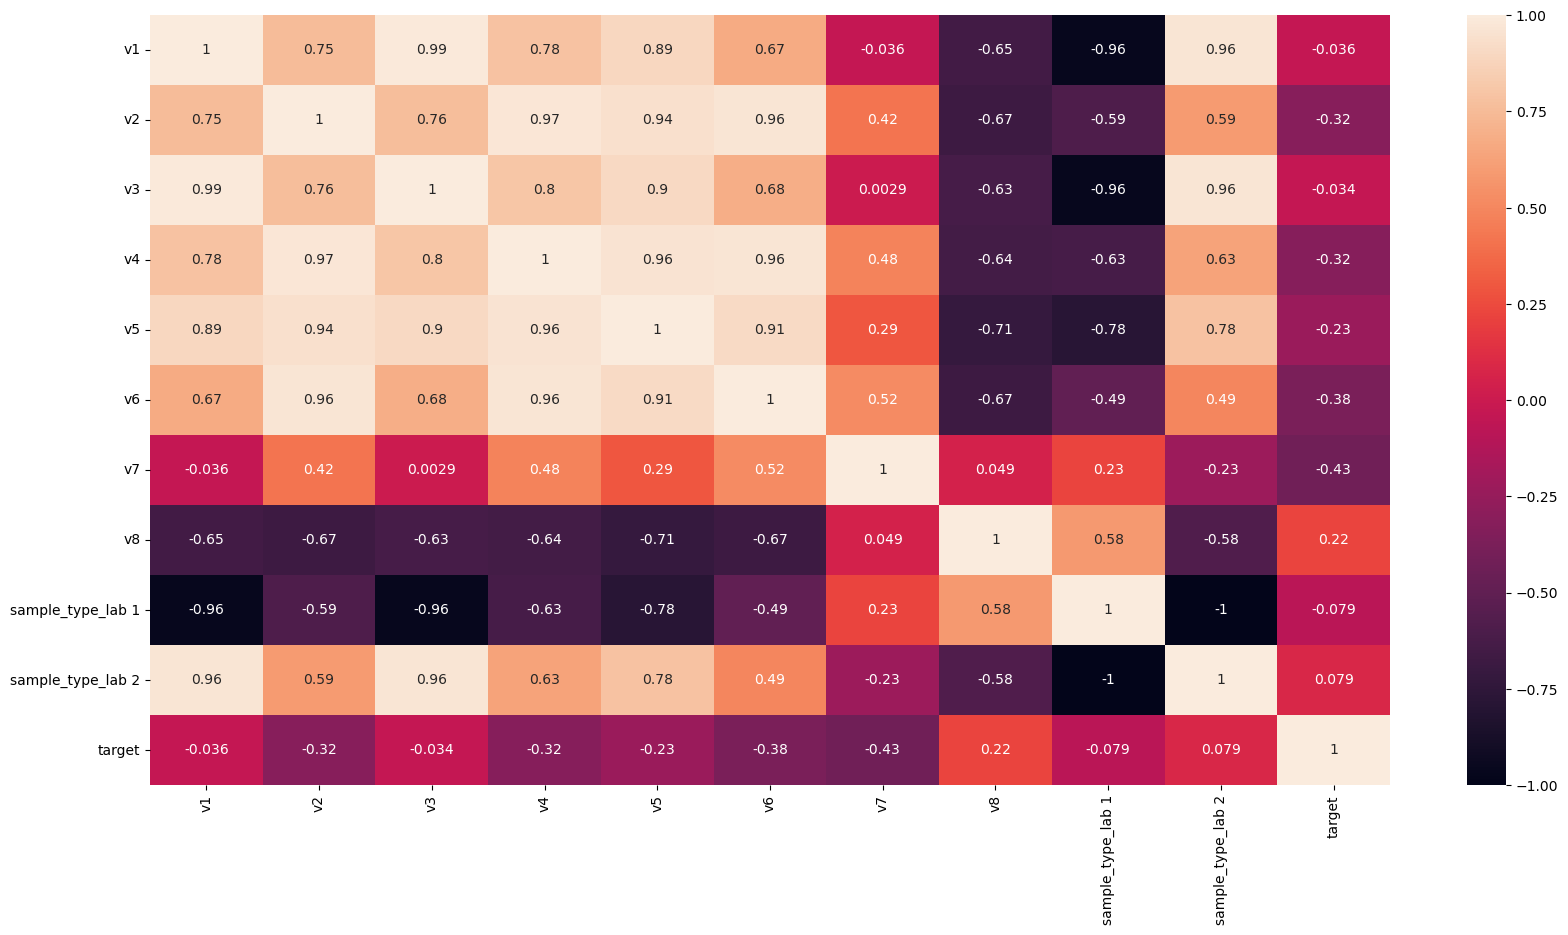

In [22]:
# Feature Selection menggunakan .corr untuk melihat hubungan feature dengan data target
fig,ax = plt.subplots(figsize=[20,10])

corr = X_train_eda.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Dari visualisasi di atas diketahui bahwa v5 dan v8 tidak terlalu memiliki pengaruh yang signifikan sedangkan sisanya cukup berpengaruh. Namun, dengan threshold nilai correlation 20%, seluruh feature dipilih untuk digunakan dalam permodelan.

### Pipelining

In [23]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']])
num_tr

array([[ 1.12056508e+00, -2.80007291e-01,  9.09535533e-01,
        -3.19319159e-01, -1.09006971e-01, -8.74945728e-01,
        -1.05583471e+00,  2.19482801e-01],
       [-3.88454126e-01,  5.25073892e-01, -4.57057865e-01,
         2.84732955e-01, -1.73272905e-01,  3.66036760e-01,
         1.24473329e+00,  1.24385657e+00],
       [-7.83641618e-01, -4.17075907e-01, -8.04887353e-01,
        -3.92428641e-01, -7.76454600e-01, -4.43498499e-01,
         3.72452323e-02,  7.33070194e-01],
       [ 9.07154922e-01, -6.51825606e-01,  9.53365419e-01,
        -1.03586261e-01,  1.13169544e-01, -7.83472817e-01,
        -1.08202452e+00,  7.00458295e-01],
       [-8.22402961e-01, -4.64340947e-01, -7.14979892e-01,
        -5.48235734e-01, -5.78148289e-01, -5.04480440e-01,
         1.29598771e-01,  1.17323080e+00],
       [ 1.63337320e+00,  1.90165939e+00,  1.50629630e+00,
         1.96122289e+00,  1.87843138e+00,  1.86010621e+00,
         1.70787939e+00, -1.78864991e+00],
       [-8.62305982e-01, -7.021431

In [24]:
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

cat_tr = cat_pipeline.fit_transform(X_train[['sample_type']])
cat_tr

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [25]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']),
        ("cat_ohe", cat_pipeline, ['sample_type'])
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[ 1.12056508, -0.28000729,  0.90953553, ...,  0.2194828 ,
         0.        ,  1.        ],
       [-0.38845413,  0.52507389, -0.45705787, ...,  1.24385657,
         1.        ,  0.        ],
       [-0.78364162, -0.41707591, -0.80488735, ...,  0.73307019,
         1.        ,  0.        ],
       ...,
       [-0.85359025, -0.31309282, -0.70655107, ...,  0.20887893,
         1.        ,  0.        ],
       [ 0.84269191, -0.78633403,  0.79012719, ...,  0.75680385,
         0.        ,  1.        ],
       [-0.59015314, -0.08115651, -0.54042295, ...,  0.66714614,
         1.        ,  0.        ]])

In [26]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[ 0.62131786, -0.74054602,  0.68371328, -0.63587722,  0.09113551,
        -1.06284633, -1.46220751,  0.01459554,  0.        ,  1.        ],
       [ 0.77705938, -0.90705682,  0.58249715, -0.90898908, -0.13379526,
        -1.03807242, -2.33913537, -0.08142699,  0.        ,  1.        ],
       [ 1.51931683,  1.90165939,  1.48213367,  1.90632524,  1.87843138,
         1.86010621,  0.2963865 , -1.90329174,  0.        ,  1.        ],
       [-0.94002359, -0.44228393, -0.95716811, -0.99887779, -1.09411193,
        -0.90391215, -0.94142659,  0.56720968,  1.        ,  0.        ],
       [-0.79968079, -0.40132089, -0.72116103, -0.30853251, -0.14573036,
        -0.01052672,  0.95526697,  0.72746815,  1.        ,  0.        ],
       [ 0.76697124, -0.26852864,  1.24648782,  0.86815347,  0.43640096,
        -0.61446573,  2.01231131,  1.13853242,  0.        ,  1.        ],
       [ 0.96730183,  0.09653753,  0.95673695, -0.195872  ,  0.35462584,
        -0.24835629, -0.39971106,  0.15245835

# Modelling

## Model Definition

Pada section ini kita akan membandingkan performansi dari 8 model :
* Linear Regression
* Lasso Regression
* Ridge Regression
* Support Vector Regression 
* K-Nearest Neighbors Regression 
* Gradient Boosting Regression
* Random Forest Regressor
* Decision Tree Regressor

In [27]:
models = {
    'LR': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SVR': SVR(),
    'KNR': KNeighborsRegressor(),
    'GBR': GradientBoostingRegressor(),
    'RF': RandomForestRegressor(),
    'DT': DecisionTreeRegressor()
}

best_model = None
best_r2 = -float('inf')
best_mse = float('inf')
for name, model in models.items():
    
    model.fit(train_tr, y_train)
    y_pred = model.predict(test_tr)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name}: R-squared = {r2:.3f}, MAE = {mae:.3f}, MSE = {mse:.3f}')
    if r2 > best_r2 or (r2 == best_r2 and mae < best_mae):
        best_model = name
        best_r2 = r2
        best_mae = mae

print(f'\nBest model according to R-squared and MAE: {best_model}')

LR: R-squared = 0.240, MAE = 0.165, MSE = 0.043
Lasso: R-squared = -0.008, MAE = 0.201, MSE = 0.056
Ridge: R-squared = 0.250, MAE = 0.165, MSE = 0.042
SVR: R-squared = 0.383, MAE = 0.154, MSE = 0.035
KNR: R-squared = 0.386, MAE = 0.151, MSE = 0.034
GBR: R-squared = 0.312, MAE = 0.147, MSE = 0.038
RF: R-squared = 0.364, MAE = 0.152, MSE = 0.036
DT: R-squared = 0.074, MAE = 0.170, MSE = 0.052

Best model according to R-squared and MAE: KNR


Dari hasil evaluasi menggunakan MAE dan R2, K-Nearest Neighbors Regression dipilih sebagai model yang digunakan. Namun, dikarenakan nilai yang didapat belum memuaskan, akan dilakukan model improvement menggunakan hyperparameter.

## Hyperparameter Tuning Using GridSearchCV

In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knr = KNeighborsRegressor()

grid_search = GridSearchCV(knr, param_grid, cv=5, scoring=['r2', 'neg_mean_squared_error'], refit='r2', return_train_score=True)

grid_search.fit(train_tr, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

y_pred = grid_search.predict(test_tr)

print('R2 score on test data:', r2_score(y_test, y_pred))
print('MAE on test data:', mean_absolute_error(y_test, y_pred))
print('MSE on test data:', mean_squared_error(y_test, y_pred))


Best hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best R2 score: 0.13660956031379318
R2 score on test data: 0.3927050321293817
MAE on test data: 0.1512731481481482
MSE on test data: 0.033947762345679006


Tuning hyperparameter untuk model KNeighborsRegressor dengan menggunakan GridSearchCV dan melakukan cross-validation dengan 5 folds. Parameter yang diuji coba adalah jumlah neighbors, tipe weight, dan tipe norm. Scoring yang digunakan adalah R2 score dan negatif mean squared error (MSE).

Hasilnya menunjukkan bahwa parameter terbaik untuk model KNeighborsRegressor adalah n_neighbors=9, p=1, dan weights=uniform.

In [29]:
# Mengapliksikan model yang sudah di tuning ke data train dan test
best_params = grid_search.best_params_

knr_best = KNeighborsRegressor(**best_params)

knr_best.fit(train_tr, y_train)

pred_train_knr_best = knr_best.predict(train_tr)
pred_test_knr_best = knr_best.predict(test_tr)

In [30]:
print('R2 train: ', r2_score(y_train, pred_train_knr_best))
print('R2 test: ', r2_score(y_test, pred_test_knr_best))
print('MAE train: ', mean_absolute_error(y_train, pred_train_knr_best))
print('MAE test: ', mean_absolute_error(y_test, pred_test_knr_best))
print('MSE train: ', mean_squared_error(y_train, pred_train_knr_best))
print('MSE test: ', mean_squared_error(y_test, pred_test_knr_best))

R2 train:  0.32748330904710776
R2 test:  0.3927050321293817
MAE train:  0.13216269841269832
MAE test:  0.1512731481481482
MSE train:  0.027536507936507908
MSE test:  0.033947762345679006


R2 test lebih tinggi dari R2 train, yang menunjukkan bahwa model mungkin agak overfitting. MAE dan MSE test juga lebih tinggi daripada nilai train, yang menunjukkan bahwa model mungkin sedikit overfitting dan tidak dapat digeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya. Oleh karena itu, ada potensi untuk meningkatkan performa model melalui tuning atau pengaturan ulang hyperparameter.

## Pipeline + Model

In [32]:
knr_best

KNeighborsRegressor(n_neighbors=9, p=1)

In [33]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7',
                                  'v8']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 ['sample_type'])])

In [34]:
# Menggabungkan pipeline dan model yang telah dituning
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("prediction", knr_best)
])

all_process.fit(X_train, y_train)
plant_nutrition = all_process.predict(X_test)

print('R2 score on test data:', r2_score(y_test, plant_nutrition))
print('MAE on test data:', mean_absolute_error(y_test, plant_nutrition))
print('MSE on test data:', mean_squared_error(y_test, plant_nutrition))

R2 score on test data: 0.3927050321293817
MAE on test data: 0.1512731481481482
MSE on test data: 0.033947762345679006


# Model Inference
Model Inference dilakukan pada notebook terpisah. Selanjutnya dilakukan Model Saving agar model dapat digunakan diluar notebook ini.

# Model Saving

In [35]:
with open('pipeline.pkl', 'wb') as file_1:
  joblib.dump(all_process, file_1)

# Conclusion

Tujuan proyek ini adalah untuk memprediksi nutrisi tanaman berdasarkan elemen / vitamin yang diberikan pada tanaman. Variabel v1-v8 merepresentasikan elemen / vitamin, sedangkan sample_type merepresentasikan tempat observasi yang terdiri dari lab 1 dan lab 2. Hasil dari model yang dibangun menunjukkan bahwa variabel v1, v2, v3, v4, v6, dan v7 memiliki dampak yang signifikan terhadap nutrisi tanaman, sedangkan variabel v5 dan v8 tidak begitu berpengaruh. Model yang terbaik untuk memprediksi nutrisi tanaman adalah K-Nearest Neighbors Regressor dengan parameter n_neighbors=9, p=1, dan weights=uniform. Model tersebut menghasilkan R2 score sebesar 0.39, yang berarti model mampu menjelaskan 39% variabilitas dari data yang digunakan. Namun, masih ada ruang untuk meningkatkan kinerja model di masa depan dengan menambahkan entri data, menambahkan variabel lain atau memperbaiki kualitas data.